In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, Masking

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, roc_auc_score, precision_recall_fscore_support, precision_recall_curve

import matplotlib as mpl 
import os 
import sys 
import time

import matplotlib.pyplot as plt

In [2]:

import ast
 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau 
import warnings
warnings.filterwarnings('ignore')
 

In [3]:
eICUerd_1st48hrs_st123_CleanedApacheResults = pd.read_csv('../data/First48Hrs_NestedDF_afterMICEforest_MergedWith_Cleaned_ApacheResultsSheet_Ver3.csv').reset_index(drop = True)
eICUerd_1st48hrs_st123_CleanedApacheResults.drop(columns = ['PredictedICUmortality_binary'], inplace = True)
eICUerd_1st48hrs_st123_CleanedApacheResults

,PatientUnitStay_ID,num_measurements,monitoring_start,monitoring_end,monitoring_duration_inMinutes_minutes,avg_measurement_interval,avg_temperature,avg_heart_rate,avg_saO2,avg_systolic_bp,...,creatinine,dischargelocation,visitnumber,amilocation,day1meds,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2
0,143941,575,6,2876,2870,5.000000,37.043043,76.794783,98.300870,101.259130,...,3.14,4.0,1,NaN,False,5.0,6.0,4.0,186.0,50.0
1,161093,573,4,2879,2875,5.026224,37.115620,74.157068,97.200698,113.804538,...,NaN,4.0,1,NaN,False,5.0,6.0,4.0,NaN,NaN
2,166995,524,21,2876,2855,5.458891,37.795229,118.765267,94.557252,101.164122,...,2.40,4.0,1,NaN,False,5.0,6.0,4.0,113.0,100.0
3,177460,576,5,2880,2875,5.000000,37.157639,84.744792,96.095486,112.310764,...,0.81,8.0,2,6.0,False,5.0,6.0,4.0,NaN,NaN
4,191266,570,10,2880,2870,5.043937,35.843333,109.840351,95.077193,100.335088,...,1.35,9.0,1,NaN,False,1.0,1.0,1.0,77.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,3352114,286,21,1446,1425,5.000000,37.250350,87.472028,98.328671,115.262238,...,0.66,8.0,1,NaN,False,5.0,6.0,4.0,NaN,NaN
963,3352178,301,15,1515,1500,5.000000,36.519269,82.428571,97.332226,118.073090,...,1.46,8.0,1,NaN,False,5.0,6.0,4.0,158.0,100.0
964,3352344,348,5,1740,1735,5.000000,37.364799,104.497126,98.537356,114.752874,...,1.33,8.0,1,NaN,False,5.0,6.0,4.0,318.0,100.0
965,3352620,429,26,2876,2850,6.658879,37.226107,90.668998,97.431235,160.184149,...,0.95,8.0,1,NaN,False,5.0,6.0,4.0,95.0,21.0


In [4]:
eICUerd_1st48hrs_st123_CleanedApacheResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PatientUnitStay_ID                         967 non-null    int64  
 1   num_measurements                           967 non-null    int64  
 2   monitoring_start                           967 non-null    int64  
 3   monitoring_end                             967 non-null    int64  
 4   monitoring_duration_inMinutes_minutes      967 non-null    int64  
 5   avg_measurement_interval                   967 non-null    float64
 6   avg_temperature                            967 non-null    float64
 7   avg_heart_rate                             967 non-null    float64
 8   avg_saO2                                   967 non-null    float64
 9   avg_systolic_bp                            967 non-null    float64
 10  avg_diastolic_bp          

In [5]:
eICUerd_1st48hrs_st123_CleanedApacheResults['predictedhospitalmortality_binary'] = (eICUerd_1st48hrs_st123_CleanedApacheResults['predictedhospitalmortality'] > 0.5).astype('boolean') 
eICUerd_1st48hrs_st123_CleanedApacheResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 99 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PatientUnitStay_ID                         967 non-null    int64  
 1   num_measurements                           967 non-null    int64  
 2   monitoring_start                           967 non-null    int64  
 3   monitoring_end                             967 non-null    int64  
 4   monitoring_duration_inMinutes_minutes      967 non-null    int64  
 5   avg_measurement_interval                   967 non-null    float64
 6   avg_temperature                            967 non-null    float64
 7   avg_heart_rate                             967 non-null    float64
 8   avg_saO2                                   967 non-null    float64
 9   avg_systolic_bp                            967 non-null    float64
 10  avg_diastolic_bp          

In [6]:
eICUerd_1st48hrs_st123_CleanedApacheResults['predictedicumortality_binary'] = (eICUerd_1st48hrs_st123_CleanedApacheResults['predictedicumortality'] > 0.5).astype('boolean')
eICUerd_1st48hrs_st123_CleanedApacheResults

,PatientUnitStay_ID,num_measurements,monitoring_start,monitoring_end,monitoring_duration_inMinutes_minutes,avg_measurement_interval,avg_temperature,avg_heart_rate,avg_saO2,avg_systolic_bp,...,visitnumber,amilocation,day1meds,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2,predictedhospitalmortality_binary,predictedicumortality_binary
0,143941,575,6,2876,2870,5.000000,37.043043,76.794783,98.300870,101.259130,...,1,NaN,False,5.0,6.0,4.0,186.0,50.0,False,False
1,161093,573,4,2879,2875,5.026224,37.115620,74.157068,97.200698,113.804538,...,1,NaN,False,5.0,6.0,4.0,NaN,NaN,False,False
2,166995,524,21,2876,2855,5.458891,37.795229,118.765267,94.557252,101.164122,...,1,NaN,False,5.0,6.0,4.0,113.0,100.0,False,False
3,177460,576,5,2880,2875,5.000000,37.157639,84.744792,96.095486,112.310764,...,2,6.0,False,5.0,6.0,4.0,NaN,NaN,False,False
4,191266,570,10,2880,2870,5.043937,35.843333,109.840351,95.077193,100.335088,...,1,NaN,False,1.0,1.0,1.0,77.0,60.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,3352114,286,21,1446,1425,5.000000,37.250350,87.472028,98.328671,115.262238,...,1,NaN,False,5.0,6.0,4.0,NaN,NaN,False,False
963,3352178,301,15,1515,1500,5.000000,36.519269,82.428571,97.332226,118.073090,...,1,NaN,False,5.0,6.0,4.0,158.0,100.0,False,False
964,3352344,348,5,1740,1735,5.000000,37.364799,104.497126,98.537356,114.752874,...,1,NaN,False,5.0,6.0,4.0,318.0,100.0,False,False
965,3352620,429,26,2876,2850,6.658879,37.226107,90.668998,97.431235,160.184149,...,1,NaN,False,5.0,6.0,4.0,95.0,21.0,False,False


In [ ]:
def load_and_parse_csv(file_path):
    """
    Load CSV file and parse the nested time series data.
    
    The time series columns contain string representations of lists that need
    to be converted back to actual Python lists for processing.
    """
    print("Loading CSV file...")
    df = pd.read_csv(file_path)
    
    # Define the time series columns we need to process
    time_series_columns = [
        'time_series_temperature', 'time_series_sao2', 'time_series_heartrate',
        'time_series_respiration', 'time_series_cvp', 'time_series_systolic_bp',
        'time_series_diastolic_bp', 'time_series_mean_bp', 'time_series_pa_systolic',
        'time_series_pa_diastolic', 'time_series_pa_mean', 'time_series_st1',
        'time_series_st2', 'time_series_st3' #, 'time_series_nested_gender',
    #    'time_series_oobintubday1_uponICUadmission',
    #    'time_series_activetx_uponICUadmission',
    #    'time_series_oobventday1_uponICUadmission',
    #    'time_series_motor_gcs_uponICUadmission',
    #    'time_series_verbal_gcs_uponICUadmission'
    #    'time_series_apachescore_uponICUadmission'
    ]
    
    print(f"Dataset shape: {df.shape}")
    print(f"Time series columns to process: {len(time_series_columns)}")
    
    # Parse string representations of lists back to actual lists
    # This handles cases where the CSV stored lists as strings like "[1.2, 1.3, 1.4]"
    for col in time_series_columns:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    return df, time_series_columns

In [8]:
load_and_parse_csv_results = load_and_parse_csv(file_path='../data/First48Hrs_NestedDF_afterMICEforest_MergedWith_Cleaned_ApacheResultsSheet.csv')

Loading CSV file...
Dataset shape: (1010, 92)
Time series columns to process: 15


In [9]:
load_and_parse_csv_results

(      PatientUnitStay_ID  num_measurements  monitoring_start  monitoring_end  \
 0                 143941               575                 6            2876   
 1                 161093               573                 4            2879   
 2                 166995               524                21            2876   
 3                 177460               576                 5            2880   
 4                 191266               570                10            2880   
 ...                  ...               ...               ...             ...   
 1005             3352114               286                21            1446   
 1006             3352178               301                15            1515   
 1007             3352344               348                 5            1740   
 1008             3352620               429                26            2876   
 1009             3352878               571                26            2876   
 
       monitoring_duration

In [10]:

TimeSeries_Features = [
                                'time_series_temperature', 'time_series_sao2', 'time_series_heartrate',
                                'time_series_respiration', 'time_series_cvp', 'time_series_systolic_bp',
                                'time_series_diastolic_bp', 'time_series_mean_bp', 'time_series_pa_systolic',
                                'time_series_pa_diastolic', 'time_series_pa_mean', 'time_series_st1',
                                'time_series_st2', 'time_series_st3' #, 'time_series_nested_gender' 
]



TimeSeries_Features = [
        'time_series_temperature', 'time_series_sao2', 'time_series_heartrate',
        'time_series_respiration', 'time_series_cvp', 'time_series_systolic_bp',
        'time_series_diastolic_bp', 'time_series_mean_bp', 'time_series_pa_systolic',
        'time_series_pa_diastolic', 'time_series_pa_mean', 'time_series_st1',
        'time_series_st2', 'time_series_st3', 'time_series_nested_gender',
        'time_series_oobintubday1_uponICUadmission',
        'time_series_activetx_uponICUadmission',
        'time_series_oobventday1_uponICUadmission',
        'time_series_motor_gcs_uponICUadmission',
        'time_series_verbal_gcs_uponICUadmission'
        'time_series_apachescore_uponICUadmission'
                ]



In [11]:
def pad_time_series_data(df, time_series_columns, padding_value=-999999):
    """
    Pad all time series to have the same length using a special padding value.
    
    We use a distinctive padding value (-999999) that will be masked out during training.
    This ensures all sequences have the same length while preserving the original
    temporal structure of each patient's data.
    """
    print("Padding time series data...")
    
    # Find the maximum length across all time series and all patients
    max_length = 0
    for col in time_series_columns:
        if col in df.columns:
            # Get the maximum length in this column across all patients
            col_max_length = df[col].apply(len).max()
            max_length = max(max_length, col_max_length)
    
    print(f"Maximum time series length found: {max_length}")
    
    # Pad each time series column to the maximum length
    for col in time_series_columns:
        if col in df.columns:
            # Pad sequences to max_length using our special padding value
            df[col] = df[col].apply(
                lambda x: x + [padding_value] * (max_length - len(x))
            )
    
    return df, max_length


In [12]:
pad_time_series_data_results = pad_time_series_data(df=load_and_parse_csv_results[0], time_series_columns=TimeSeries_Features) # or time_series_columns = TimeSeries_Features)

Padding time series data...
Maximum time series length found: 664


In [13]:
pad_time_series_data_results

(      PatientUnitStay_ID  num_measurements  monitoring_start  monitoring_end  \
 0                 143941               575                 6            2876   
 1                 161093               573                 4            2879   
 2                 166995               524                21            2876   
 3                 177460               576                 5            2880   
 4                 191266               570                10            2880   
 ...                  ...               ...               ...             ...   
 1005             3352114               286                21            1446   
 1006             3352178               301                15            1515   
 1007             3352344               348                 5            1740   
 1008             3352620               429                26            2876   
 1009             3352878               571                26            2876   
 
       monitoring_duration

def prepare_lstm_data(df, time_series_columns, target_column=['actualicumortality']):
    """
    Convert the padded time series data into the 3D format required by LSTM.
    
    LSTM expects input in shape (ICU Stays, Measurements across the same time steps, Features) where:
    - rows / ICU stays: number of patient visits
    - # of measurements across time steps: length of time series (padded to be consistent)
    - features: number of different measurements (14 vital signs)
    """
    print("Preparing data for LSTM...")
    
    # Create the 3D array for LSTM input
    # Shape will be (n_patient_visits, max_timesteps, n_features)
    n_patient_visits = len(df)
    max_timesteps = len(df[time_series_columns[0]].iloc[0])  # All should be same length after padding
    n_features = len(time_series_columns)
    
    global X, y
    X = np.zeros((n_patient_visits, max_timesteps, n_features))
    
    # Fill the 3D array with time series data
    for i, (_, row) in enumerate(df.iterrows()):
        for j, col in enumerate(time_series_columns):
            if col in df.columns:
                X[i, :, j] = row[col]
    
    # Extract target variable (mortality outcome)
    y = df[target_column].values
    
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    # print(f"Target distribution: {np.bincount(y)}")
    
    
     
    return X, y

prepare_lstm_data_results = prepare_lstm_data(df=load_and_parse_csv_results[0], time_series_columns=load_and_parse_csv_results[1], target_column=['actualicumortality']) # or time_series_columns = TimeSeries_Features)


In [14]:
df=load_and_parse_csv_results[0]
time_series_columns=load_and_parse_csv_results[1]
target_column=['actualicumortality']

In [15]:
n_patients = len(df)
max_timesteps = len(df[time_series_columns[0]].iloc[0])  # All should be same length after padding
n_features = len(time_series_columns)

# global X, y
X = np.zeros((n_patients, max_timesteps, n_features))

# Fill the 3D array with time series data
for i, (_, row) in enumerate(df.iterrows()):
    for j, col in enumerate(time_series_columns):
        if col in df.columns:
            X[i, :, j] = row[col]

# Extract target variable (mortality outcome)
y = df[target_column].values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
# print(f"Target distribution: {np.bincount(y)}")



X shape: (1010, 664, 15)
y shape: (1010, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify = y, random_state = 421)

In [17]:
X_train.shape

(808, 664, 15)

In [18]:
y_train.shape

(808, 1)

In [19]:
padding_value = -999999

In [20]:

"""
Normalize features while preserving the padding values.

We need to be careful not to include padding values in our normalization
statistics, as they would skew the mean and standard deviation.
"""
print("Normalizing features...")


# Create a mask to identify non-padding values
train_mask = X_train != padding_value 

# Calculate statistics only on non-padding values
scalers_X = []
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

# Normalize each feature separately
for feature_idx in range(X_train.shape[2]):
    scaler = StandardScaler()
    
    # Get all non-padding values for this feature across all patients and timesteps
    feature_data = X_train[:, :, feature_idx]
    non_padding_values = feature_data[train_mask[:, :, feature_idx]]
    
    # Fit scaler only on non-padding values
    scaler.fit(non_padding_values.reshape(-1, 1))
    scalers_X.append(scaler)
    
    # Transform training data (preserving padding values)
    feature_mask = train_mask[:, :, feature_idx]
    normalized_values = scaler.transform(feature_data[feature_mask].reshape(-1, 1)).flatten()
    X_train_normalized[:, :, feature_idx][feature_mask] = normalized_values
    
    # Transform test data (preserving padding values)
    test_feature_data = X_test[:, :, feature_idx]
    test_feature_mask = X_test[:, :, feature_idx] != padding_value
    if test_feature_mask.any():
        test_normalized_values = scaler.transform(test_feature_data[test_feature_mask].reshape(-1, 1)).flatten()
        X_test_normalized[:, :, feature_idx][test_feature_mask] = test_normalized_values

      


Normalizing features...


In [21]:
train_mask

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, Fal

In [22]:
X_train_normalized

array([[[-1.65008145e+00,  1.04194805e+00,  2.51644473e-01, ...,
         -2.83997434e-01, -2.75947346e-01,  0.00000000e+00],
        [-1.65008145e+00,  1.04194805e+00,  2.51644473e-01, ...,
         -2.86080033e-01, -2.81257715e-01,  0.00000000e+00],
        [-1.53603814e+00,  1.04194805e+00,  2.51644473e-01, ...,
         -2.90245231e-01, -2.86568082e-01,  0.00000000e+00],
        ...,
        [-9.99999000e+05, -9.99999000e+05, -9.99999000e+05, ...,
         -9.99999000e+05, -9.99999000e+05,  0.00000000e+00],
        [-9.99999000e+05, -9.99999000e+05, -9.99999000e+05, ...,
         -9.99999000e+05, -9.99999000e+05,  0.00000000e+00],
        [-9.99999000e+05, -9.99999000e+05, -9.99999000e+05, ...,
         -9.99999000e+05, -9.99999000e+05,  0.00000000e+00]],

       [[-3.24668767e+00,  1.04194805e+00,  1.16478588e+00, ...,
         -2.65254046e-01, -2.49395504e-01,  0.00000000e+00],
        [-3.13264437e+00,  1.04194805e+00,  1.29523465e+00, ...,
         -2.65254046e-01, -2.54705872e

In [23]:
X_test_normalized

array([[[-9.65821636e-01,  1.04194805e+00,  1.09956149e+00, ...,
         -2.42345461e-01, -2.36119583e-01,  0.00000000e+00],
        [-2.81561825e-01,  1.04194805e+00,  1.03433710e+00, ...,
         -2.40262862e-01, -2.38774768e-01,  0.00000000e+00],
        [-8.51778334e-01,  1.04194805e+00,  1.03433710e+00, ...,
         -2.40262862e-01, -2.38774768e-01,  0.00000000e+00],
        ...,
        [-9.99999000e+05, -9.99999000e+05, -9.99999000e+05, ...,
         -9.99999000e+05, -9.99999000e+05,  0.00000000e+00],
        [-9.99999000e+05, -9.99999000e+05, -9.99999000e+05, ...,
         -9.99999000e+05, -9.99999000e+05,  0.00000000e+00],
        [-9.99999000e+05, -9.99999000e+05, -9.99999000e+05, ...,
         -9.99999000e+05, -9.99999000e+05,  0.00000000e+00]],

       [[-9.65821636e-01, -6.34036457e+00,  2.73017114e+00, ...,
         -2.81914836e-01, -2.91878451e-01,  0.00000000e+00],
        [-9.65821636e-01, -9.71409941e-01,  2.86061991e+00, ...,
         -2.73584441e-01, -2.91878451e

In [24]:
scalers_X

[StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler(),
 StandardScaler()]

normalize_features_results = normalize_features(X_train, X_test, padding_value=-999999)
normalize_features_results

In [25]:
def build_lstm_model(input_shape, padding_value=-999999):
    """
    Build an LSTM model with masking layer to handle variable-length sequences.
    
    The Masking layer tells the LSTM to ignore time steps with our padding value,
    allowing the model to focus only on actual patient data.
    """
    print("Building LSTM model...")
    
    model = Sequential([
        # Masking layer ignores time steps with padding_value
        # This is crucial for handling variable-length sequences properly
        Masking(mask_value=padding_value, input_shape=input_shape),
        
        # First LSTM layer with return_sequences=True to stack layers
        # 64 units provides fairly good capacity for learning temporal patterns
        LSTM(320, input_shape = input_shape, return_sequences=True, dropout=0.1, recurrent_dropout=0.1),
        
        # Second LSTM layer (final layer doesn't return sequences)
        # 32 units for final temporal feature extraction
        LSTM(160, dropout=0.1, recurrent_dropout=0.1),
        
        # Dense layer for feature transformation
        Dense(16, activation='tanh'),
        #Dropout(0.3),
        
        # Output layer for binary classification (mortality prediction)
        Dense(1, activation='sigmoid')
    ])
    
    # Compile with appropriate loss function and metrics for binary classification
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    print("Model architecture:")
    model.summary()
    
    return model

In [26]:
X_train.shape[1:]

(664, 15)

In [27]:
build_lstm_model_result = build_lstm_model(input_shape=X_train.shape[1:], padding_value=-999999)
build_lstm_model_result

Building LSTM model...
Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 664, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 664, 320)       │       430,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 160)            │       307,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         2,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 740,513 (2.82 MB)

 Trainable params: 740,513 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential, built=True>

In [28]:
def train_model(model, X_train, y_train, X_test, y_test, epochs=100):
    """
    Train the LSTM model with callbacks for optimization and early stopping.
    """
    print("Training model...")
    
    # Callbacks for better training
    callbacks = [
        # Stop training if validation loss doesn't improve for 10 epochs
        EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
        
        # Reduce learning rate if validation loss plateaus
        ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-7, monitor='val_loss')
    ]
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=epochs,
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=2
    )
    
    return history

In [ ]:
train_model_result = train_model(model=build_lstm_model_result, X_train=X_train_normalized, y_train=y_train, X_test=X_test_normalized, y_test=y_test, epochs=100)
train_model_result

Training model...
Epoch 1/100


In [ ]:
def evaluate_model(model, X_test_normalized, y_test):
    """
    Evaluate the trained model and provide comprehensive metrics.
    """
    print("Evaluating model...")
    
    # Make predictions
    global y_pred_proba, y_pred
    y_pred_proba = model.predict(X_test_normalized)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    
    # Calculate metrics
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_normalized, y_test, verbose=0)
    auc_roc_score = roc_auc_score(y_test, y_pred)
 
    
    print(f"\nModel Performance:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"AUC-ROC Score: {auc_roc_score:.4f}")
 
    
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division = 0, target_names=['Lived Through ICU Stay', 'Died in ICU']))    
    print(f"\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return y_test, y_pred, y_pred_proba 

In [ ]:
evaluate_model_result = evaluate_model(model=build_lstm_model_result, X_test_normalized=X_test_normalized, y_test=y_test)
evaluate_model_result

Evaluating model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step

Model Performance:
Test Accuracy: 0.9703
Test Precision: 0.5714
Test Recall: 0.5714
AUC-ROC Score: 0.7780

Classification Report:
                        precision    recall  f1-score   support

Lived Through ICU Stay       0.98      0.98      0.98       195
           Died in ICU       0.57      0.57      0.57         7

              accuracy                           0.97       202
             macro avg       0.78      0.78      0.78       202
          weighted avg       0.97      0.97      0.97       202


Confusion Matrix:
[[192   3]
 [  3   4]]


(array([[False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

In [ ]:
print(classification_report(eICUerd_1st48hrs_st123_CleanedApacheResults['actualicumortality'], eICUerd_1st48hrs_st123_CleanedApacheResults['predictedicumortality_binary'], zero_division = 0, target_names=['Lived Through ICU Stay ', 'Died in ICU'])) 

                         precision    recall  f1-score   support

Lived Through ICU Stay        0.97      0.99      0.98       935
            Died in ICU       0.50      0.25      0.33        32

               accuracy                           0.97       967
              macro avg       0.74      0.62      0.66       967
           weighted avg       0.96      0.97      0.96       967



In [ ]:
def plot_training_history(history):
    """
    Plot training and validation metrics to visualize model performance.
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Plot training & validation accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    
    # Plot training & validation loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    
    # Plot precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Model Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    
    # Plot recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Model Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

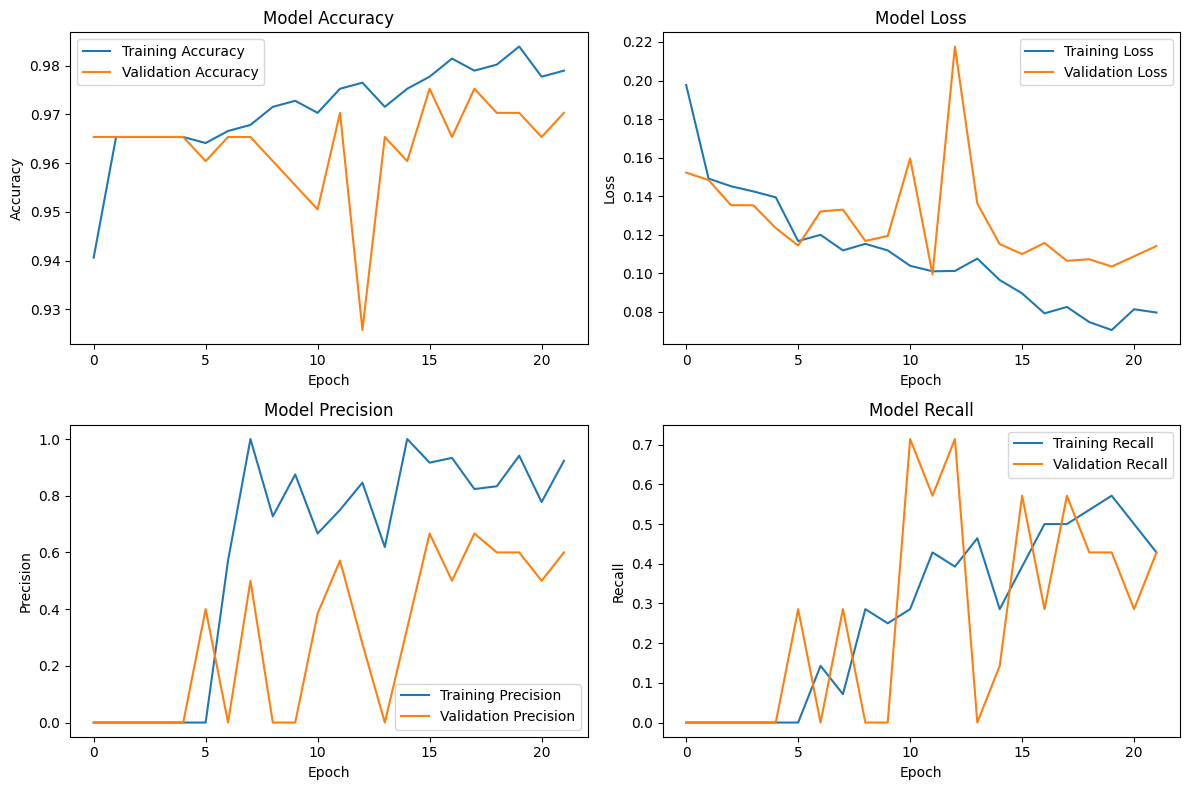

In [ ]:
plot_training_history_result = plot_training_history(history = train_model_result)
plot_training_history_result

def plot_APACHE4a_vs_LSTMtimeSeries_ICUMortalityProbPredictions(y_ApacheIVaPred, y_LSTMpred):
    """
    Create visualizations to assess regression model performance.
    
    These plots help understand how well the model predictions align with
    actual ICU length of stay values and identify potential patterns in errors.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Scatter plot: Predicted vs Actual
    axes[0].scatter(y_ApacheIVaPred, y_LSTMpred, alpha=0.6, color='blue')
    axes[0].plot([y_ApacheIVaPred.min(), y_ApacheIVaPred.max()], [y_ApacheIVaPred.min(), y_ApacheIVaPred.max()], 
                 'r--', lw=2, label='Perfect Prediction')
    axes[0].set_xlabel('Actual ICU Stay (days)')
    axes[0].set_ylabel('Predicted ICU Stay (days)')
    axes[0].set_title('Predicted vs Actual ICU Length of Stay')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Residuals plot (prediction errors)
    residuals = y_LSTMpred - y_ApacheIVaPred
    axes[1].scatter(y_LSTMpred, residuals, alpha=0.6, color='green')
    axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[1].set_xlabel('Predicted ICU Stay (days)')
    axes[1].set_ylabel('Residuals (Predicted - Actual)')
    axes[1].set_title('Residuals Plot')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_APACHE4a_vs_LSTMtimeSeries_ICUMortalityProbPredictions_results = plot_APACHE4a_vs_LSTMtimeSeries_ICUMortalityProbPredictions(y_ApacheIVaPred=eICUerd_1st48hrs_st123_CleanedApacheResults['predictedicumortality'], y_LSTMpred=y_pred_proba) 
plot_APACHE4a_vs_LSTMtimeSeries_ICUMortalityProbPredictions_results  